# Session 1
## Running a simulation 

First we import pybamm

In [1]:
import pybamm

We now load the model that we wish to run. For this notebook, we choose the Doyle-Fuller-Newman (DFN) model

In [2]:
model = pybamm.lithium_ion.DFN()

We now use this model to create a PyBaMM Simulation, which is used to process and solve the model

In [3]:
sim = pybamm.Simulation(model)

We can then call 'solve' on our simulation object to solve the model, passing the window of time to solve for in seconds

In [4]:
sim.solve([0, 3600])

Finally, we can call 'plot' to generate a dynamic plot of the key variables

In [5]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

We can pass a list of variables we wish to plot

In [6]:
sim.plot(["Current [A]", "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

To find out which variables are available in the model, we can do

In [7]:
model.variable_names()

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'Sum of electrolyte reaction source terms',
 'Sum of negative electrode electrolyte reaction source terms',
 'Sum of positive electrode electrolyte reaction source terms',
 'Sum of x-averaged negative electrode electrolyte reaction source terms',
 'Sum of x-averaged positive electrode electrolyte reaction source terms',
 'Sum of interfacial current densities',
 'Sum of negative electrode interfacial current densities',
 'Sum of positive electrode interfacial current densities',
 'Sum of x-averaged negative electrode interfacial current densities',
 'Sum of x-averaged positive electrode interfacial current densities',
 'r_n',
 'r_n [m]',
 'r_p',
 'r_p [m]',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Porosity',
 'Negative electrode porosity',
 'Separator porosi

This returns an extremely long list! We can also search for variables we might be interested in

In [8]:
model.variables.search("electrolyte current")

Electrolyte current density
Electrolyte current density [A.m-2]


You will notice that most variables appear more than once. This is because models in PyBaMM are posed in dimensionless form, so the variables have a dimensional (with \[units\]) and dimensionless version. 

We can pass a nested list of variables to plot more than one variable on the same axes

In [9]:
sim.plot([["Electrolyte current density", "Electrode current density"], "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

You might want to create your own custom plot instead of plotting the solution using PyBaMMM's built-in plotting, or you might want to work with the solution data directly. First we will extract the solution from the simulation 

In [10]:
solution = sim.solution

We can then access the solution like a python dictionary to get the variables we are interested in. For example, to get time series data for the voltage we can do   

In [11]:
solution["Terminal voltage [V]"].data

array([3.77161552, 3.75501849, 3.7480021 , 3.74283899, 3.73829635,
       3.73402627, 3.72991827, 3.72593474, 3.72206272, 3.71829813,
       3.71464002, 3.71108777, 3.70764002, 3.70429359, 3.70104288,
       3.69787967, 3.69479461, 3.69178033, 3.68883328, 3.68595333,
       3.68314128, 3.6803981 , 3.67772429, 3.67511964, 3.67258328,
       3.67011393, 3.6677093 , 3.66536735, 3.66308519, 3.66085959,
       3.65868708, 3.65656379, 3.65448497, 3.652446  , 3.65044107,
       3.64846326, 3.64650431, 3.64455375, 3.64259725, 3.64061492,
       3.63857659, 3.63643562, 3.6341222 , 3.63155561, 3.62870179,
       3.62563188, 3.62250095, 3.61947666, 3.61668481, 3.6141869 ,
       3.61198489, 3.61004366, 3.60831537, 3.606755  , 3.60532649,
       3.60400385, 3.6027688 , 3.60160921, 3.6005173 , 3.59948783,
       3.59851548, 3.59759156, 3.59670003, 3.59581837, 3.59492511,
       3.59400668, 3.59305675, 3.59207461, 3.59105989, 3.59001312,
       3.58893439, 3.58782331, 3.58667831, 3.58549734, 3.58427

which returns 1D array. We can get the data for a variable that depends on space in the same way

In [12]:
solution["Electrolyte current density"].data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03438215, 0.03035694, 0.02873254, ..., 0.0620573 , 0.06066966,
        0.05945911],
       [0.06895148, 0.06092774, 0.05769945, ..., 0.12378815, 0.12105345,
        0.11866727],
       ...,
       [0.09566967, 0.09261763, 0.09226255, ..., 0.12868194, 0.1217314 ,
        0.11598656],
       [0.04783522, 0.04629582, 0.04611501, ..., 0.06444211, 0.06094058,
        0.05804759],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

This returns a 2D array with the electrolyte current density as a function of position at each time in the simulation. 

We can also save solution objects or data (see the Getting Started guides for more information). For example, we can save time series data to csv by doing

In [13]:
solution.save_data("dfn_data.csv", ["Time [s]", "Terminal voltage [V]"])

Now that we have the data we can create a custom plot using our favourite plotting tools

Text(0, 0.5, 'Voltage [V]')

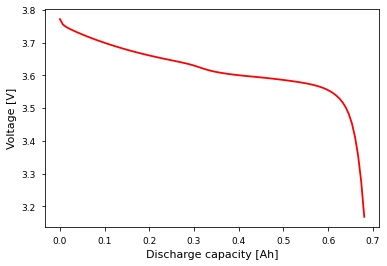

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dcap = solution["Discharge capacity [A.h]"].data
voltage = solution["Terminal voltage [V]"].data
ax.plot(dcap, voltage)
ax.set_xlabel("Discharge capacity [Ah]")    
ax.set_ylabel("Voltage [V]")